In [2]:
#Feature selection and Preprocessing 
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv(r"c:\Users\LENOVO\OneDrive\Dokumenti\ola dataset.csv")

# Convert datetime and extract features
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Handle missing values (mean imputation)
for col in ['temp', 'humidity', 'windspeed']:
    df[col].fillna(df[col].mean(), inplace=True)

# Select features for modeling
selected_features = ['temp', 'humidity', 'windspeed', 'hour', 'dayofweek', 'count']
df_model = df[selected_features].copy()

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23996\1016405304.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [3]:
#kmeans Clustering -Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop target for clustering
features_for_clustering = df_model.drop(columns='count')




In [4]:
# Scale clustering features
scaler_cluster = StandardScaler()
scaled_clustering_data = scaler_cluster.fit_transform(features_for_clustering)

# Elbow method to find optimal k
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_clustering_data)
    inertia.append(kmeans.inertia_)


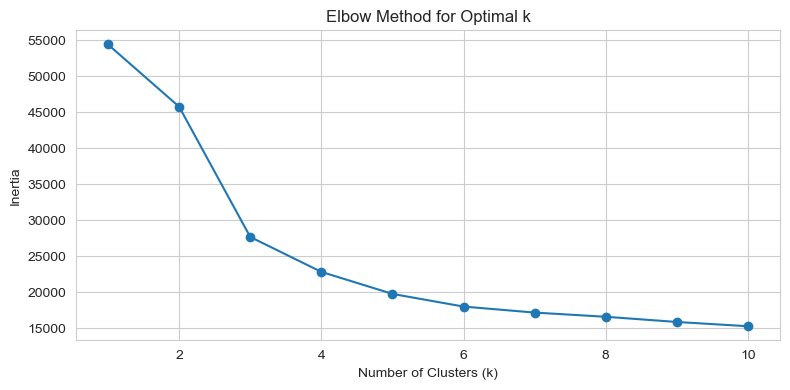

In [5]:
# Plot Elbow Curve
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.tight_layout()
plt.show()

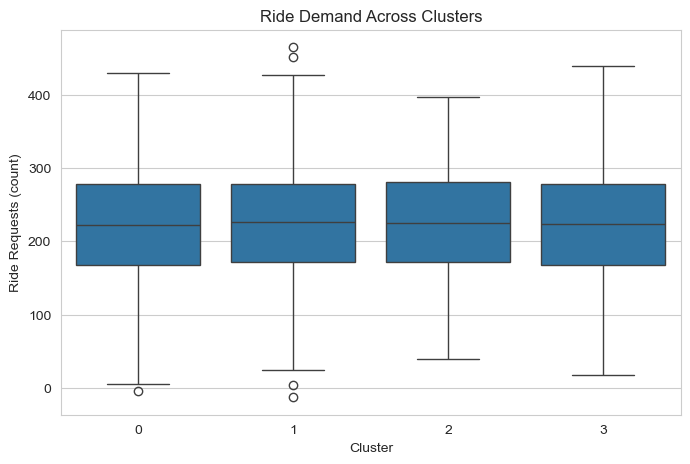

In [6]:
#kmeans clustering 
from sklearn.cluster import KMeans

# Use the same scaled clustering data
kmeans_final = KMeans(n_clusters=4, random_state=42)
df_model['cluster'] = kmeans_final.fit_predict(scaled_clustering_data)

# Optional: Visualize cluster behavior
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='cluster', y='count', data=df_model)
plt.title('Ride Demand Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Ride Requests (count)')
plt.show()


In [7]:
#Ride Demand Prediction using ML
#prepare data for modelling 
from sklearn.model_selection import train_test_split

# Define features and target
features = ['temp', 'humidity', 'windspeed', 'hour', 'dayofweek', 'cluster']
X = df_model[features]
y = df_model['count']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Train the models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)